In [1]:
import cv2
import numpy as np
import os
from glob import glob
#from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def show(img, title="", cmap="gray", size=6):
    plt.figure(figsize=(size, size))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

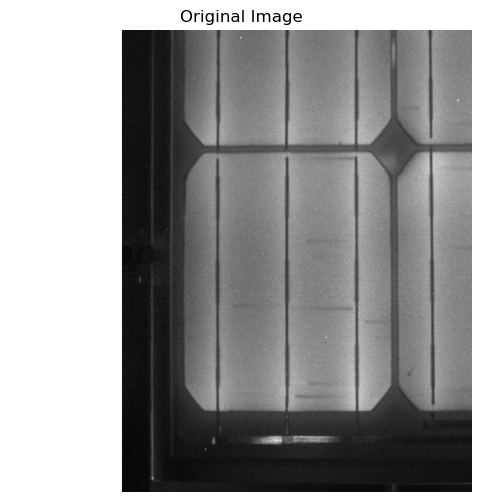

In [3]:
img = cv2.imread(r"D:\PROGRAMMING\Internships_assignments\ResearchInternIITMandi\dataset\dataset\ARTS_00007_r12_c1.png", 
                 cv2.IMREAD_GRAYSCALE)

show(img, "Original Image")

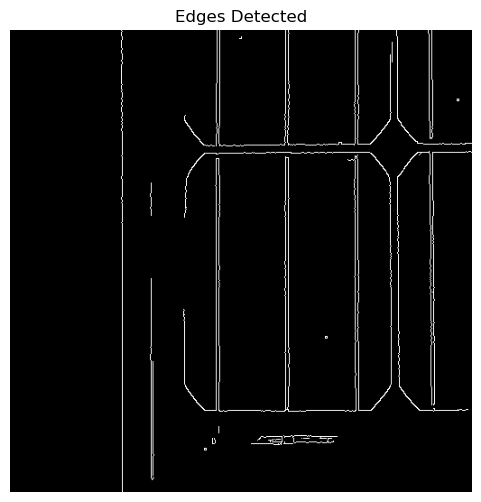

In [19]:
blurred_img = cv2.GaussianBlur(img, (1, 1), 0)

# Apply the Canny edge detector to detect edges in the image
edges = cv2.Canny(blurred_img, threshold1=100, threshold2=200)

# Show the edges detected
show(edges, title="Edges Detected")

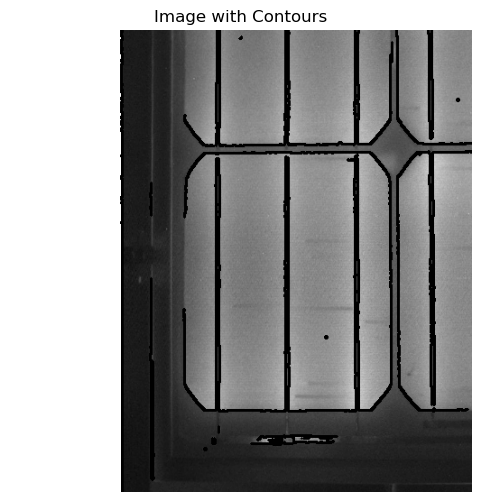

In [20]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
contoured_img = img.copy()
cv2.drawContours(contoured_img, contours, -1, (0, 255, 0), 2)

# Show the image with contours
show(contoured_img, title="Image with Contours")


In [21]:
grid_contours = []
for contour in contours:
    # Filtering out small contours (noise)
    if cv2.contourArea(contour) > 1000:  # Adjust this threshold depending on image size
        grid_contours.append(contour)

# Assuming a regular grid, find the middle contour
# Get the bounding box of each contour
bounding_boxes = [cv2.boundingRect(c) for c in grid_contours]

# Sort bounding boxes based on their x and y coordinates to identify the middle one
bounding_boxes = sorted(bounding_boxes, key=lambda x: (x[1], x[0]))  # Sorting by y, then by x

# Assume the middle cell is in the middle of the bounding boxes
middle_box = bounding_boxes[len(bounding_boxes) // 2]

# Extract the middle cell using the bounding box
x, y, w, h = middle_box
middle_cell = img[y:y+h, x:x+w]

# Show the cropped middle cell
show(middle_cell, title="Middle Cell")

IndexError: list index out of range